# FORMATTING


##String

In [1]:
Student_Details = [('Name', 'Age', 'State', 'Reg NO'), 
                   ('Rohit', '22', 'Bihar', 'XXXXXXXXXX4848'),
                   ('Hari', '25', 'Chhatishgarh', 'XXXXXXXXXX4889'),
                   ('Ram', '19', 'Goa', 'XXXXXXXXXX5483')]

In [4]:
for name, age, state, reg_no in Student_Details:
  print(f"{name} {age} {state} {reg_no}")

Name Age State Reg NO
Rohit 22 Bihar XXXXXXXXXX4848
Hari 25 Chhatishgarh XXXXXXXXXX4889
Ram 19 Goa XXXXXXXXXX5483


In [5]:
for name, age, state, reg_no in Student_Details:
  print(f"{name:{10}} {age:{10}} {state:{20}} {reg_no:{20}}")

Name       Age        State                Reg NO              
Rohit      22         Bihar                XXXXXXXXXX4848      
Hari       25         Chhatishgarh         XXXXXXXXXX4889      
Ram        19         Goa                  XXXXXXXXXX5483      


In [7]:
for name, age, state, reg_no in Student_Details:
  print(f"{name:{10}} {age:{10}} {state:{20}} {reg_no:->{20}}")

Name       Age        State                --------------Reg NO
Rohit      22         Bihar                ------XXXXXXXXXX4848
Hari       25         Chhatishgarh         ------XXXXXXXXXX4889
Ram        19         Goa                  ------XXXXXXXXXX5483


##Date

In [9]:
from datetime import datetime

 [Different datetime cheatsheet](https://strftime.org/)

In [11]:
today = datetime(year=2023, month= 5, day=7)
print(f"{today}")

2023-05-07 00:00:00


In [14]:
print(f"{today:%A, %B, %d, %Y}")

Sunday, May, 07, 2023


# FILES

##Text

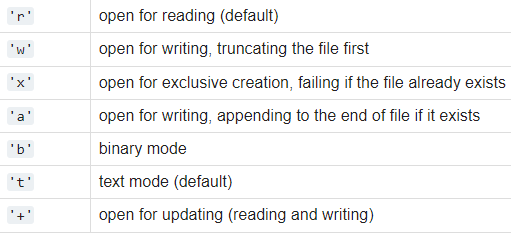

'w+' - overwrite the file

'a+' - create new file if not exist and in append mode 

In [26]:
with open("text.txt", 'w') as f:
  f.write("This is a test file.\n")
  f.write("This is second line of test file")

In [18]:
#print working directory
!pwd

/content


In [31]:
myfile = open("/content/text.txt")

In [32]:
myfile.read()

'This is a test file.\nThis is second line of test file'

In [33]:
myfile.read() # Since the cursor is moded to the end

''

In [34]:
myfile.seek(0)
myfile.read()

'This is a test file.\nThis is second line of test file'

In [35]:
myfile.seek(0)
file_content = myfile.read()
print(file_content)

This is a test file.
This is second line of test file


##Pdf

**Not all pdf have text that can be extracted like scan PDF file whic have image**

In [36]:
!pip install PyPDF2 
import PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.5 MB/s eta 0:00:00


In [71]:
with open("/content/US_Declaration.pdf", 'rb') as myfile:    # rb - readbinary
  pdf_reader = PyPDF2.PdfReader(myfile)
  print(len(pdf_reader.pages))
  first_page = pdf_reader.pages[0]
  first_page_text = first_page.extract_text()

5


In [72]:
first_page_text

"Declaration of Independence\nIN CONGRESS, July 4, 1776.  \nThe unanimous Declaration of the thirteen united States of America,  \nWhen in the Course of human events, it becomes necessary for one people to dissolve thepolitical bands which have connected them with another, and to assume among the powers of theearth, the separate and equal station to which the Laws of Nature and of Nature's God entitlethem, a decent respect to the opinions of mankind requires that they should declare the causeswhich impel them to the separation. We hold these truths to be self-evident, that all men are created equal, that they are endowed bytheir Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit\nof Happiness.— \x14That to secure these rights, Governments are instituted among Men, derivingtheir just powers from the consent of the governed,—  \x14That whenever any Form of Government\nbecomes destructive of these ends, it is the Right of the People to alter or to 

In [ ]:
#Adding page to pdf
f = open("/content/US_Declaration.pdf", 'rb')
pdf_reader = PyPDF2.PdfReader(f)
first_page = pdf_reader.pages[0]
pdf_writer = PyPDF2.PdfWriter()
pdf_writer.add_page(first_page)

In [74]:
pdf_output = open("new_file.pdf", 'wb')
pdf_writer.write(pdf_output) 

(False, <_io.BufferedWriter name='new_file.pdf'>)

In [75]:
pdf_output.close()
f.close()

In [76]:
new_file = open("/content/new_file.pdf", 'rb')
pdf_reader = PyPDF2.PdfReader(new_file)
len(pdf_reader.pages)

1

In [77]:
new_file.close()

In [81]:
#Reading all the text from a pdf file
my_file = open("/content/US_Declaration.pdf", 'rb')
pdf_text = []                                      # For extracting text from apage and storing it into list
pdf_reader = PyPDF2.PdfReader(my_file)
for p_num in range(len(pdf_reader.pages)):
  page = pdf_reader.pages[p_num]
  text = page.extract_text()
  pdf_text.append(text)
  

In [82]:
len(pdf_text)

5

In [83]:
pdf_text[0]

"Declaration of Independence\nIN CONGRESS, July 4, 1776.  \nThe unanimous Declaration of the thirteen united States of America,  \nWhen in the Course of human events, it becomes necessary for one people to dissolve thepolitical bands which have connected them with another, and to assume among the powers of theearth, the separate and equal station to which the Laws of Nature and of Nature's God entitlethem, a decent respect to the opinions of mankind requires that they should declare the causeswhich impel them to the separation. We hold these truths to be self-evident, that all men are created equal, that they are endowed bytheir Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit\nof Happiness.— \x14That to secure these rights, Governments are instituted among Men, derivingtheir just powers from the consent of the governed,—  \x14That whenever any Form of Government\nbecomes destructive of these ends, it is the Right of the People to alter or to 

## Regualar Expression

**For Extraction of te email, pone number, date, time etc eichhave specific format from a document.**

In [90]:
text = "My phone number is 012-345-6789.Where is my phone"
"phone" in text

True

In [91]:
import re
pattern = "phone"
my_match = re.search(pattern, text)
my_match   # it is only giving first match

<re.Match object; span=(3, 8), match='phone'>

In [92]:
print(my_match.span())
print(my_match.start())
print(my_match.end())

(3, 8)
3
8


In [95]:
all_match = re.findall(pattern, text)
all_match

['phone', 'phone']

In [96]:
for m in re.finditer(pattern, text):
  print(m.span()) 

(3, 8)
(44, 49)


**IDENTIFIERS**
<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >\d</span></td><td>A digit</td><td>file_\d\d</td><td>file_25</td></tr>

<tr ><td><span >\w</span></td><td>Alphanumeric</td><td>\w-\w\w\w</td><td>A-b_1</td></tr>



<tr ><td><span >\s</span></td><td>White space</td><td>a\sb\sc</td><td>a b c</td></tr>



<tr ><td><span >\D</span></td><td>A non digit</td><td>\D\D\D</td><td>ABC</td></tr>

<tr ><td><span >\W</span></td><td>Non-alphanumeric</td><td>\W\W\W\W\W</td><td>*-+=)</td></tr>

<tr ><td><span >\S</span></td><td>Non-whitespace</td><td>\S\S\S\S</td><td>Yoyo</td></tr></table>

In [97]:
# Searching Phone number
pattern = r'\d\d\d-\d\d\d-\d\d\d\d'
phone_number = re.search(pattern, text)
phone_number

<re.Match object; span=(19, 31), match='012-345-6789'>

In [98]:
phone_number.group()

'012-345-6789'

**QUANTIFIERS**
<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >+</span></td><td>Occurs one or more times</td><td>	Version \w-\w+</td><td>Version A-b1_1</td></tr>

<tr ><td><span >{3}</span></td><td>Occurs exactly 3 times</td><td>\D{3}</td><td>abc</td></tr>



<tr ><td><span >{2,4}</span></td><td>Occurs 2 to 4 times</td><td>\d{2,4}</td><td>123</td></tr>



<tr ><td><span >{3,}</span></td><td>Occurs 3 or more</td><td>\w{3,}</td><td>anycharacters</td></tr>

<tr ><td><span >\*</span></td><td>Occurs zero or more times</td><td>A\*B\*C*</td><td>AAACC</td></tr>

<tr ><td><span >?</span></td><td>Once or none</td><td>plurals?</td><td>plural</td></tr></table>

In [99]:
pattern = r'\d{3}-\d{3}-\d{4}'
phone_number = re.search(pattern, text)
phone_number.group()

'012-345-6789'

In [100]:
#Grouping
pattern = r'(\d{3})-(\d{3})-(\d{4})'
phone_number = re.search(pattern, text)
phone_number.group()

'012-345-6789'

In [101]:
phone_number.group(1)

'012'

In [102]:
# Or
re.search(r"man|woman","This man was here.")

<re.Match object; span=(5, 8), match='man'>

In [103]:
re.search(r"man|woman","This woman was here.")

<re.Match object; span=(5, 10), match='woman'>

In [ ]:
#Wildcard Char
re.findall(r".at","The cat in the hat sat here.")

In [104]:
# Sentence Ends with a number
re.findall(r'\d$','This ends with a number 2')

['2']

In [105]:
# Sentence Starts with a number
re.findall(r'^\d','1 is the loneliest number.')

['1']

In [108]:
#Exclusion
phrase = "there are 3 numbers 34 inside 5 this sentence."
re.findall(r'[^\d]+',phrase)

['there are ', ' numbers ', ' inside ', ' this sentence.']

In [109]:
test_phrase = 'This is a string! But it has punctuation. How can we remove it?'
re.findall('[^!.? ]+',test_phrase)

['This',
 'is',
 'a',
 'string',
 'But',
 'it',
 'has',
 'punctuation',
 'How',
 'can',
 'we',
 'remove',
 'it']

In [112]:
' '.join(re.findall('[^!.? ]+',test_phrase))

'This is a string But it has punctuation How can we remove it'

In [113]:
text = 'Only find the hypen-words in this sentence. But you do not know how long-ish they are'
re.findall(r'[\w]+-[\w]+',text)

['hypen-words', 'long-ish']

In [114]:
#pattern for email
pattern = r"\w+@\w+.\w+"